# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [41]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [42]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [43]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [5,100,400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9413,8259,5126,666,1795,1451
1,11594,7779,12144,3252,8035,3029
2,4446,906,1238,3576,153,1014


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**<br>
0: fresh: top 50%, milk: top 25%, grocery: top 50%, frozen: bottom 25%, detergents top 50%, delicatessen top 25%<br>
A lot of milk, fair amount of fresh, detergents, grocery, and deli, little frozen. A relatively large customer that isn't as interested in frozen foods. I guess a market, or hotel. <br>

1: fresh: top 50%, milk: top 25%, grocery: top 50%, frozen: almost in the top 25%, detergents top 25%, delicatessen top 50%<br>
I guess a market. A lot of detergents_paper was bought, probably too much for a restaurant or cafe. A lot of fresh food and milk items were bought, which fits with a market (resale). The volume of everything also seems too much for a restaurant or cafe. <br>

2: fresh: bottom 50%, milk: bottom 25%, grocery: bottom 25%, frozen: the top 25%, detergents bottom 25%, delicatessen top 50%<br> 
A small establishment that buys (proportionately) a lot of frozen, and deli, and very little detergents and milk. I would guess a cafe or restaurant, given its size and small amount of paper/detergents bought. 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [44]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.copy()
new_data.drop('Grocery', axis=1, inplace=True)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size = 0.33, random_state = 10)


# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
from sklearn.metrics import r2_score
prediction = regressor.predict(X_test)

score = r2_score(y_test, prediction)
print "R2 score: ", score

R2 score:  0.715332180183


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**<br>
I chose the Grocery feature. The prediction R^2 score was 0.71, which means that the other features predict it with a relatively high R^2. The Grocery feature may not be that informative or necessary for identifying customers' spending habits. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

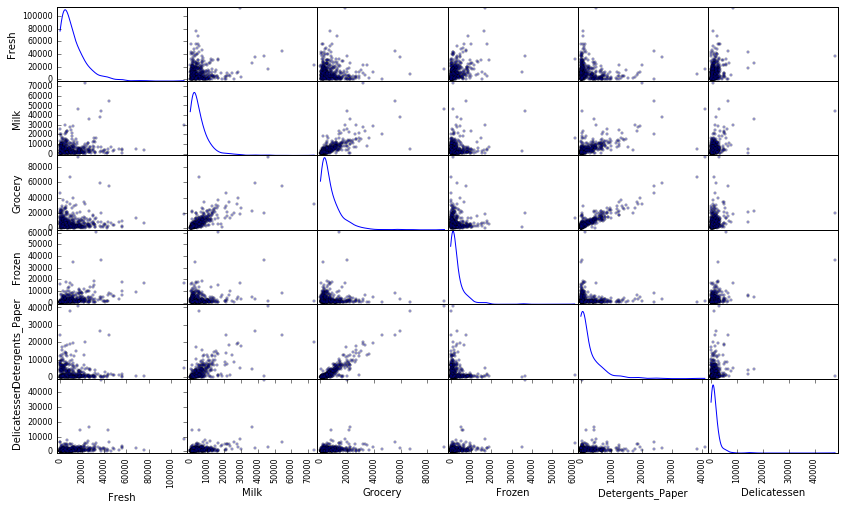

In [45]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**<br>
Correlations I see: Grocery and Milk, Detergents_Paper and Milk, Grocery and Detergents_Paper. The strongest correlation is between Detergents_Paper and Grocery. It confirms my suspicions about Grocery as a feature. <br>

Most of the data points for all of the pairs are near the origin. Also, each of the features are skewed right. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

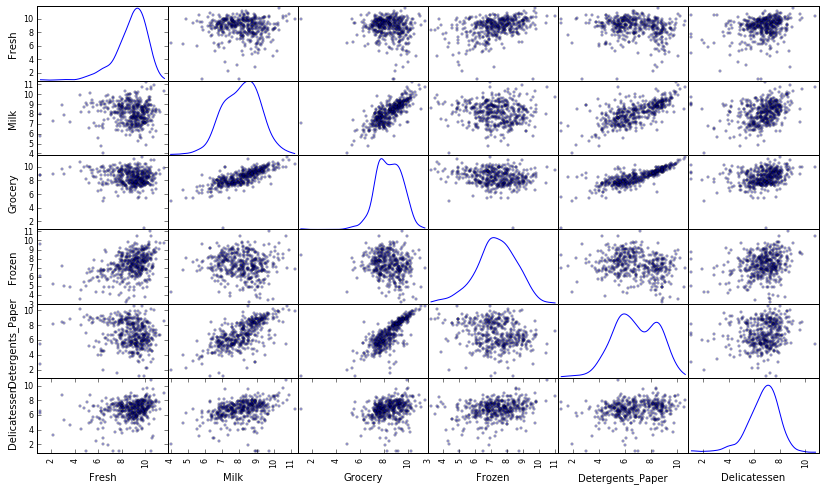

In [46]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [47]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
1,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [48]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**<br>
Indices below have multiple outliers:<br>
65: Fresh, Frozen<br>
66: Fresh, Delicatessen<br>
75: Grocery, Detergents_Paper<br>
128: Fresh, Delicatessen<br>
154: Milk, Grocery, Delicatessen<br>

I decided to err on the side of not removing data points. With that in mind:

On the one hand, 154 is an outlier for three features. In all cases it is on the low side. Since the data tends to be skewed toward the low side to begin with, this data point seems particularly troublesome and is a candidate for removal. I displayed the original figures in the table below of all the outliers to help me think about the points.<p>

On the other hand, since all of the categories for 154 are low, it might just be that this is a small establishment: nothing like a recording error seems to have happened here. Point 75 seems more likely to be a recording error, as it is relatively high in all the categories for which it isn't an outlier. For this customer, a very large amount was spent on fresh produce, and a fair amount on frozen and deli. However, this might be explained if the customer is a large restuarant that had already stocked up on detergents and other non-perishables. <p>

I decided to remove 154, even though the categories seem balanced relative to size, the size of the order as a whole is not typical of the data set. 


In [49]:
# Add indices of multiple outliers
i = [65, 66, 75, 128, 154]

# Create a DataFrame for multiple outliers
multiple_outliers = pd.DataFrame(data.loc[i], columns = data.keys())
print "Have outliers on more than one feature:"
display(multiple_outliers)

Have outliers on more than one feature:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,85,20959,45828,36,24231,1423
66,9,1534,7417,175,3468,27
75,20398,1137,3,4407,3,975
128,140,8847,3823,142,1062,3
154,622,55,137,75,7,8


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

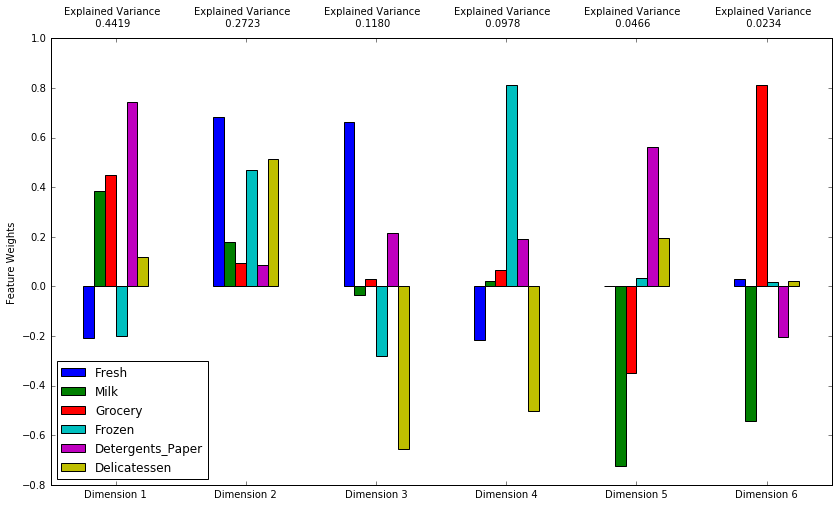

In [50]:
from sklearn.decomposition import PCA
# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca = pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**<br>
Total Explained Variance<br>
The first two components: 0.7142<br>
The first four components: 0.93<br>

What the dimensions represent:<br>
Dimension 1: The positive-weighted features are Milk (considerable), Grocery (grocery), Detergents_Paper (large), Delicatessen (small), and the negative-weighted features are Fresh and Frozen. Perhaps this indicates household products that are purchased together.<br>

Dimension 2: All of the features are positively-weighted, though the prominent features are Fresh, Frozen, and Delicatessen. This dimension represents variance correlation between Fresh, Frozen, Delicatessen: perhaps it stands for food products that are bought together. <br>

Dimension 3: The positively-weighted features include Fresh, Grocery, and Detergents_Paper, while the negatively-weighted features include Milk, Frozen and Delicatessen. The prominent features are Fresh, Frozen, Detergents_Paper, and Delicatessen, with Fresh and Delicatessen especially prominent. This dimension corresponds with purchases of Fresh and significant decreases in Frozen Delicatessen: it might stand for items that do not require refrigeration.<br>

Dimension 4: The positively-weighted features are Milk, Grocery, Frozen, and Detergents_Paper, with a heavy weighting on Frozen. The negatively-weighted features include Fresh and Delicatessen. It could represent spending on food that lasts a long time, or convenience items, especially if the Detergents_Paper was heavy on the paper side (plates, cups, etc). 




### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [51]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.0503,0.4425,0.2250,-0.8918,-0.1936,-0.5365
1,2.2551,1.9035,-0.2151,0.3226,0.5865,-0.0564
2,-2.4950,-0.2047,-1.0023,0.2071,0.5026,0.0064


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [52]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [53]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.0503,0.4425
1,2.2551,1.9035
2,-2.4950,-0.2047


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**<br>
First part adapted from my Udacity forum post: https://discussions.udacity.com/t/understanding-the-difference-between-em-and-k-means/176843<br>

The Algorithms: <br>
The Gausian Mixture Model (GMM) is a form of Expectation Maximization (EM) that starts with K randomly selected cluster centers. It iterates through the clusters and for each cluster iterates through all the data points, calculating the probability that each point would be in a given cluster given its distance from the cluster center. The probability is based on the distribution of the distances of all the data from that center, with the assumption that the distribution is Gaussian. After it is finished with this, it assigns each point to the cluster in which it mostly likely belongs. <br>

In the second phase, EM recalculates each cluster center by taking all of the points that belong to a cluster and calculating a new mean. It then returns to phase one and repeats until the means and cluster assignments stabilize. <br>

K-means is a special case of EM. In the first phase, instead of assigning a Gaussian distribution-based probability, K-means simply assigns a probability of 1 or 0 to a data point’s belonging to a cluster; a 1 for the cluster closest to it, 0 for all the rest. It is thus a “hard” clustering algorithm as opposed to a “soft” clustering algorithm in which points are considered to be “shared” between clusters with varying probabilities. The rest of the algorithm is the same as EM.<br>

Advantages and Disadvantages:<br>
GMM: Can produce "soft" clusters. There may be times that it is best to represent a point as belonging to more than one cluster, with varying degrees of "belonging." A disadvantage of EM is that it can get "stuck" in local optima, forcing the us to run it multiple times with different random initializations to get good results. <br>

K-means: It doesn't get "stuck" in the way GMM might. It should be faster than GMM, for the comparison chart in the sklearn documentation gives it the lowest runtime on the toy example out of a variety of algorithms (https://discussions.udacity.com/t/k-means-vs-gmm-speed/161658/2, also the sklearn documentation below). It has less computing to do, as with each iteration it only needs to find the mean for each centroid as opposed to computing a Gaussian distribution. <br>

My choice: GMM<br>
Our data set is small, and we are only interested in a very small number of clusters, so I don't think speed is that important. As far as soft clustering goes, it adds more information to our analysis. I expect soft clustering to be useful when we would prefer to think of examples being in more than one category. For example, could a customer be both a restaurant and a market, or a hotel and a restaurant? Sure. Local minima could be a problem, but we could rerun GMM multiple times if this becomes a problem. <br>



References:<br>
http://scikit-learn.org/stable/modules/clustering.html<br>
https://en.wikipedia.org/wiki/Mixture_model

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [54]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score


#A list of different number of clusters to try up to 20. 
n_clusters = range(2,20)


#convenience method for running the code below with differing numbers of clusters
def applyGMMToVaryingClusters(no_clusters):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components = no_clusters, random_state=1)
    clusterer.fit(reduced_data)  

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    return preds, centers, sample_preds, score

for k in n_clusters:   
    print "Number of clusters: {} Silhouette score: {}".format(k, applyGMMToVaryingClusters(k)[3])

#Using the number of clusters with the highest silhouette score
preds, centers, sample_preds, score = applyGMMToVaryingClusters(2)   

Number of clusters: 2 Silhouette score: 0.395226566135
Number of clusters: 3 Silhouette score: 0.390995735424
Number of clusters: 4 Silhouette score: 0.295718077722
Number of clusters: 5 Silhouette score: 0.268165398704
Number of clusters: 6 Silhouette score: 0.287922512698
Number of clusters: 7 Silhouette score: 0.317970017225
Number of clusters: 8 Silhouette score: 0.301219680459
Number of clusters: 9 Silhouette score: 0.313623690328
Number of clusters: 10 Silhouette score: 0.303152772028
Number of clusters: 11 Silhouette score: 0.249027229138
Number of clusters: 12 Silhouette score: 0.24073337118
Number of clusters: 13 Silhouette score: 0.279800891112
Number of clusters: 14 Silhouette score: 0.176194471755
Number of clusters: 15 Silhouette score: 0.181163316893
Number of clusters: 16 Silhouette score: 0.172397288653
Number of clusters: 17 Silhouette score: 0.220582440918
Number of clusters: 18 Silhouette score: 0.194391681112
Number of clusters: 19 Silhouette score: 0.214083145277


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
I printed the silhouette scores in the cell above. The number of clusters with the best silhouette score is 2. 

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

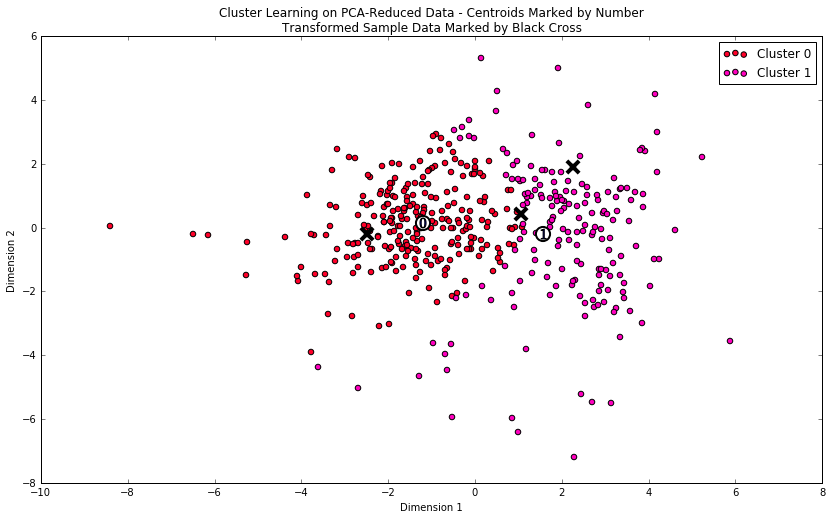

In [55]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [56]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8846,2214,2777,2042,375,744
Segment 1,3920,5954,9243,989,2806,861


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**<br>
Segment 0: top 50% Fresh, bottom 50% Milk, bottom 50% Grocery, top 50% Frozen, bottom 50% Detergents_Paper, bottom 50% Delicatessen<br>
Segment 1: bottom 50% Fresh, top 50% Milk, top 50% Grocery, bottom 50% Frozen, top 50% Detergents_Paper, bottom 50% Delicatessen<br>

Cluster 0 represents establishments that order more Fresh and Frozen and less of the other kinds of items. Cluster 1 establishments order more Milk, Grocery, and Detergents_Paper than other items. The biggest difference is between Detergents_Paper. A restaurant wouldn't order as much of these, but hotels and markets/grocery stores might. The second biggest difference is with Grocery, with the estabishments that order more Detergents_Paper ordering more Grocery as well (segment 1), suggesting that segment 1 represents hotels/markets and segment 0 represents restaurants/cafes. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [57]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**
<table>
<hr><td>Data Point</td><td>My earlier predction</td><td>Cluster Assignment Prediction</td></hr>
<tr><td>0</td><td>market/hotel</td><td>restaurant/cafe</td></tr>
<tr><td>1</td><td>market/hotel</td><td>market/hotel</td></tr>
<tr><td>2</td><td>restaurant/cafe</td><td>restaurant/cafe</td></tr>
</table>

Discussion:<br>
**Sample 0 --- From above:**<br>
<em>"fresh: top 50%, milk: top 25%, grocery: top 50%, frozen: bottom 25%, detergents top 50%, delicatessen top 25%<br>
A lot of milk, fair amount of fresh, detergents, grocery, and deli, little frozen. A relatively large customer that isn't as interested in frozen foods. I guess a market, or hotel." </em><br>

Given that cluster 0 represents increased spending in Fresh and Frozen and a decreased spending in other items, especially Detergents_Paper, and sample, and this sample is in the top 50% for Detergents_Paper and the bottom 25% for Frozen, I wouldn't have expected it to be put in cluster 0 and labeled a restaurant/cafe. However, Fresh was in the to %50, and delicatessen also was in the top %25 for this sample. These must have compensated for the the high Detergents_Paper and low Frozen spending. However, the point, in the graph above, is near the border of the cluster, indicating that it is probably best described as sharing both clusters. <br>  

Sample 1 --- From above:<br>
<em>"fresh: top 50%, milk: top 25%, grocery: top 50%, frozen: almost in the top 25%, detergents top 25%, delicatessen top 50%<br>
I guess a market. A lot of detergents_paper was bought, probably too much for a restaurant or cafe. A lot of fresh food and milk items were bought, which fits with a market (resale). The volume of everything also seems too much for a restaurant or cafe." </em><br>

Cluster 1 represents increased spending in Milk, Grocery, and Detergents_Paper. Sample 1 showed high spending in these categories, though it also shows a lot of spending in Fresh. Since Detergents_Paper spending is important, I think that my earlier classification is at least largely consistent with the clustering assignment and description of a market/hotel. <br>

Sample 2 --- From above:<br>
<em>"fresh: bottom 50%, milk: bottom 25%, grocery: bottom 25%, frozen: the top 25%, detergents bottom 25%, delicatessen top 50%<br> 
A small establishment that buys (proportionately) a lot of frozen, and deli, and very little detergents and milk. I would guess a cafe or restaurant, given its size and small amount of paper/detergents bought."</em><br>

Sample 2 mostly fits the spending pattern in cluster 0, with a very small amount of Milk, Grocery, and Detergent_Paper spending, and a lot of spending in Frozen. Complicating this is the relatively low amount spent on Fresh. However, in most categories the sample fits cluster 0, which is consistent with my earlier guess of a restaurant/cafe.

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:**<br>
A change in service from 5 to 3 days a week would affect restaurants and cafes more than markets, hotels, and other retailers, as they would be serving fresh (hopefully) food. Also, those buying a lot of fresh produce would probably want the produce to really be fresh, and less frequent deliveries mean less fresh food. If I were to focus on a particular segment, I would choose the restaurants/cafes (group 0), or I would choose customers who spent the most in the Fresh category (in proportion to their total orders). <p>

The "A" group could be simply a random sample of the customers, while the "B" group could be either a sample from the restaurants/cafes or from the top 25% of customers in terms of their Fresh to Total ratios. I could also compare group 0 with group 1. 

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:**<br>
We could use % chance of being in one of the two groups (Restaurants/Cafes versus Hotels/Markets) learned from EM as a new feature for supervised learning. I prefer this to just assigning them to a group, as there is a fair amount of overlap between these two categories. Using the "soft" grouping should help account for imperfections in group assignments. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

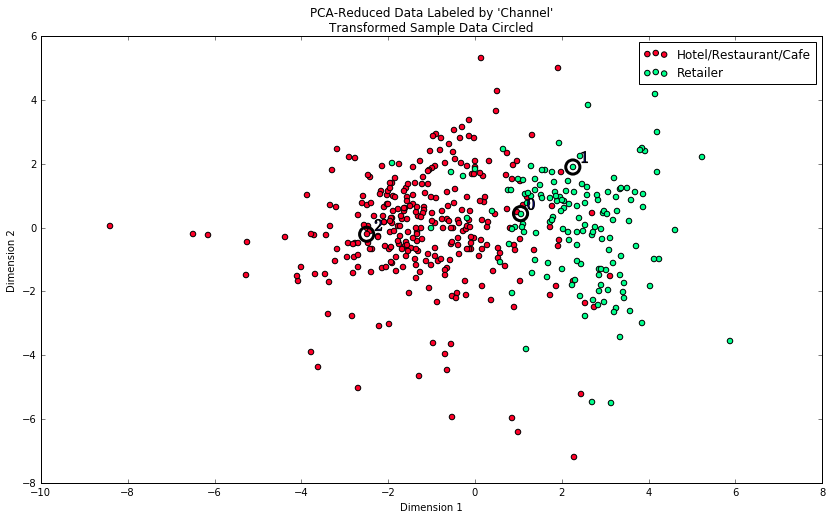

In [58]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**<br>
<em>How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?</em>
In this new distribution, there are points nearest the cluster centers labeled as belonging to the other cluster, though not the majority of clusers. This must be because channel is being considered, and could change the cluster of some of the points, though not most of them.<br>

<em>Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?</em> From what I can tell, since neither of the two regions are labeled all HoReCa or Retail, there aren't any.<br>

<em>Would you consider these classifications as consistent with your previous definition of the customer segments?</em>
I didn't consider "Retail" as a type of establishment. I don't have a lot of domain knowledge, but I figured that the only retailers selling food items would be markets, (including mini markets), cafes/restaurants, and hotels with restaurants, though there might be a relatively small number of school bookstores and other unusual stores that have a freezer or candy section. So instead of "Retail" I had hotels/markets, and instead of "Hotel/Restaurant/Cafe" I had restaurant/cafe. I did have the same number of clusters/categories as this distribution. The segments distributions are about the same, but the names would change as described. 



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.